# Monte Carlo: Lecture 3 Excercises
_Jose Javier Fernández González_

Crude “hit or miss” Monte Carlo method

## Area of a circle in two dimensions

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Useful Functions
def eval_theta_function(radius, params_array):
    x = radius**2 - sum(params_array**2)
    if x>=0:
        return 1
    else:
        return 0
    
def gen_vector(dim):
    return np.random.uniform(-1,1,dim)

def run_sim(N_iter, N_dim, radius):
    ## Calculate all results
    a_values = []
    for i in range(N_iter):
            a_values.append(
                 (2*radius)**N_dim * eval_theta_function(radius, gen_vector(N_dim))
            )
    
    ## Calculate Volume and Statistical Error
    a_values = np.array(a_values)
    volume = np.mean(a_values)
    stat_error = np.sqrt(np.mean(a_values**2) - volume**2)/np.sqrt(N_iter)
    return volume,stat_error

In [15]:
# Testing
N_iter = 500
N_dim = 2
radius = 1

volume,stat_error = run_sim(N_iter, N_dim, radius)
actual_error = abs(volume - np.pi * radius**2)

print(f"Integral Result: {volume:.3e}")
print(f"Statistical Error: {stat_error:.3e}")
print(f"Actual Error: {actual_error:.3e}")

Integral Result: 3.112e+00
Statistical Error: 7.434e-02
Actual Error: 2.959e-02


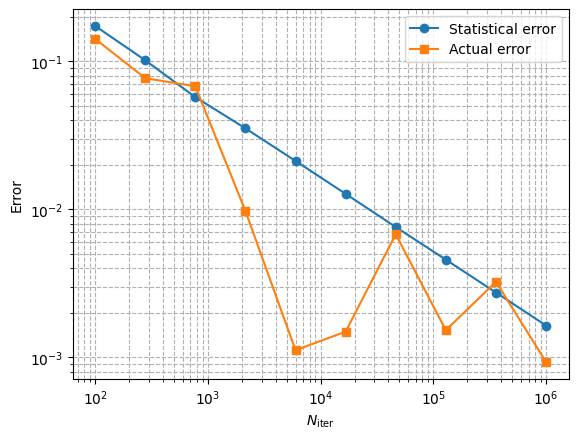

In [16]:
# Plotting Log-Log Scale

N_values = np.logspace(2, 6, 10, dtype=int)
stat_errors = []
actual_errors = []

N_dim = 2
radius = 1

for N_iter in N_values:
    volume, stat_error = run_sim(N_iter, N_dim, radius)
    stat_errors.append(stat_error)
    actual_errors.append(abs(volume - np.pi * radius**2))

plt.figure()
plt.loglog(N_values, stat_errors, 'o-', label=r'Statistical error')
plt.loglog(N_values, actual_errors, 's-', label=r'Actual error')

plt.xlabel(r'$N_{\rm iter}$')
plt.ylabel('Error')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()

## Volume of a sphere in three dimensions

Using the generalized functions:

In [17]:
N_iter = 1_000_000
N_dim = 3
radius = 1

volume,stat_error = run_sim(N_iter, N_dim, radius)
actual_error = abs(volume - (4/3) * np.pi * radius**3)

print(f"Integral Result: {volume:.3e}")
print(f"Statistical Error: {stat_error:.3e}")
print(f"Actual Error: {actual_error:.3e}")

Integral Result: 4.193e+00
Statistical Error: 3.995e-03
Actual Error: 4.146e-03


## Volume of a sphere in D dimensions

In [21]:
## Import Gamma Function
from scipy.special import gamma

def run_sim_with_errors(N_iter, N_dim, radius):
    ## Calculate all results
    a_values = []
    for i in range(N_iter):
            a_values.append(
                 (2*radius)**N_dim * eval_theta_function(radius, gen_vector(N_dim))
            )
    
    ## Calculate Volume, Statistical Error and Relative Error
    a_values = np.array(a_values)
    
    volume = np.mean(a_values)
    
    stat_error = np.sqrt(np.mean(a_values**2) - volume**2)/np.sqrt(N_iter)

    V_exact = np.pi**(N_dim/2) * radius**N_dim / gamma(N_dim/2 + 1)
    rel_error = abs(V_exact - volume) / abs(V_exact)
    
    return volume, stat_error, rel_error

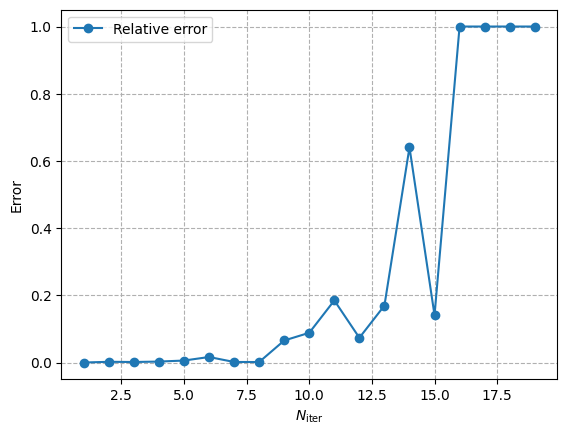

In [ ]:
# Plotting the relative errors for different dimensions 

N_dim_values= np.arange(1,20,dtype=int)
relative_error_results = []
for N_dim in N_dim_values:
    results = run_sim_with_errors(N_iter=100_000, N_dim=N_dim, radius=1)
    relative_error_results.append(results[2])

plt.figure()
plt.plot(N_dim_values, relative_error_results, 'o-', label=r'Relative error')

plt.xlabel(r'$N_{\rm iter}$')
plt.ylabel('Error')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()

Up to this point, the results aren't reliable after aproximately 15 dimensions.

The atio between the volume of the sphere of diameter 2R and a cube with side 2R in D dimensions is:

$$
\frac{V_{sphere}}{V_{cube}} = \frac{\pi ^{D/2} R^D /\Gamma(D/2 + 1)}{(2R)^D} = \frac{\pi ^{D/2}}{2^D \times \Gamma(D/2 + 1)}
$$

## 100 Dimensions

In [9]:
results = run_sim_with_errors(N_iter=1_000_000, N_dim=100, radius=1)
print(f"Integral Result: {results[0]:.3e}")
print(f"Statistical Error: {results[1]:.3e}")
print(f"Relative Error: {results[2]:.3e}")

Integral Result: 0.000e+00
Statistical Error: 0.000e+00
Relative Error: 1.000e+00


In [10]:

def run_sim_highD_importance(N_iter, N_dim, radius, sigma=None):
    # Choose sigma if not provided (reasonable default for high D)
    if sigma is None:
        sigma = radius / np.sqrt(N_dim)

    a_values = np.empty(N_iter, dtype=float)

    for i in range(N_iter):
        # Sample from N(0, sigma^2 I)
        x = np.random.normal(loc=0.0, scale=sigma, size=N_dim)
        r2 = np.sum(x**2)

        if r2 <= radius**2:
            a_values[i] = (2*np.pi)**(N_dim/2) * (sigma**N_dim) * np.exp(r2 / (2*sigma**2))
        else:
            a_values[i] = 0.0

    volume = np.mean(a_values)
    stat_error = np.sqrt(np.mean(a_values**2) - volume**2) / np.sqrt(N_iter)

    V_exact = (np.pi**(N_dim/2)) * (radius**N_dim) / gamma(N_dim/2 + 1)

    rel_error = abs(volume - V_exact) / abs(V_exact)
    return volume, stat_error, rel_error


In [11]:
results = run_sim_highD_importance(N_iter=1_000_000, N_dim=100, radius=1)
print(f"Integral Result: {results[0]:3e}")
print(f"Statistical Error: {results[1]:.3e}")
print(f"Relative Error: {results[2]:.3e}")

Integral Result: 2.363206e-40
Statistical Error: 6.659e-43
Relative Error: 2.110e-03


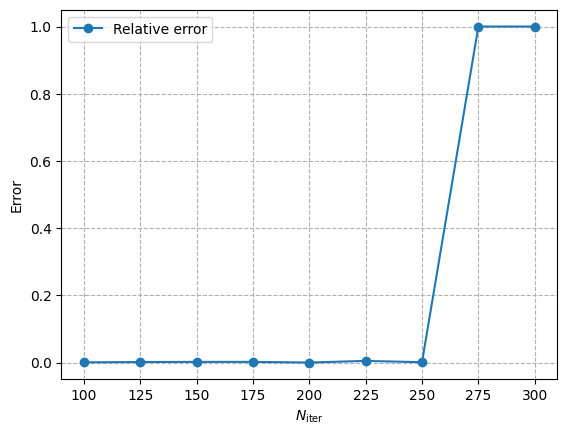

In [76]:
N_dim_values=np.arange(start=100, stop=325, step=25, dtype=int)
relative_error_results = []

for N_dim in N_dim_values:
    results = run_sim_highD_importance(N_iter=1_000_000, N_dim=N_dim, radius=1)
    relative_error_results.append(results[2])

plt.figure()
plt.plot(N_dim_values, relative_error_results, 'o-', label=r'Relative error')

plt.xlabel(r'$N_{\rm iter}$')
plt.ylabel('Error')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()

So after 275 dimensions, the method isn't reliable anymore